In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
train_data.shape

(7352, 563)

In [5]:
test_data.shape

(2947, 563)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train_data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [8]:
train_data['Activity'].value_counts().values

array([1407, 1374, 1286, 1226, 1073,  986], dtype=int64)

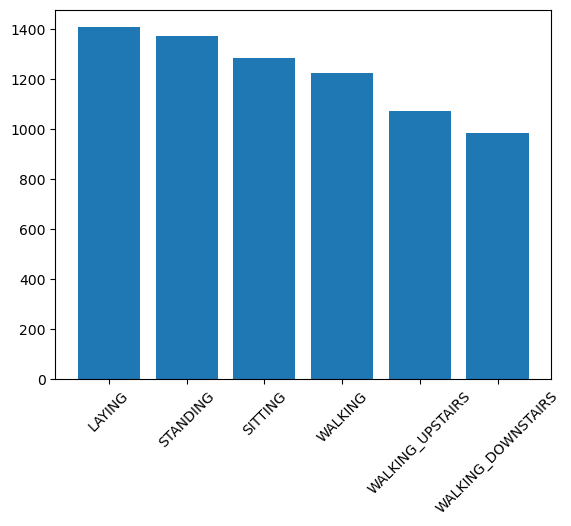

In [9]:
plt.bar(train_data['Activity'].value_counts().index, train_data['Activity'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

In [10]:
x_train, y_train, = train_data.drop(['Activity', 'subject'], axis=1), train_data.Activity
x_test, y_test = test_data.drop(['Activity', 'subject'], axis=1), test_data.Activity

In [11]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(750,250,25), solver='lbfgs', random_state=1, max_iter=1000)

In [14]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(750, 250, 25), max_iter=1000, random_state=1,
              solver='lbfgs')

In [15]:
mlp.score(x_test, y_test)

0.9518154054971157

In [16]:
y_pred = mlp.predict(x_test)
y_pred

array([2, 2, 2, ..., 5, 5, 5])

In [17]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[537,   0,   0,   0,   0,   0],
       [  1, 460,  30,   0,   0,   0],
       [  0,  32, 500,   0,   0,   0],
       [  0,   0,   0, 462,  14,  20],
       [  0,   0,   0,   4, 400,  16],
       [  0,   0,   0,  11,  14, 446]], dtype=int64)

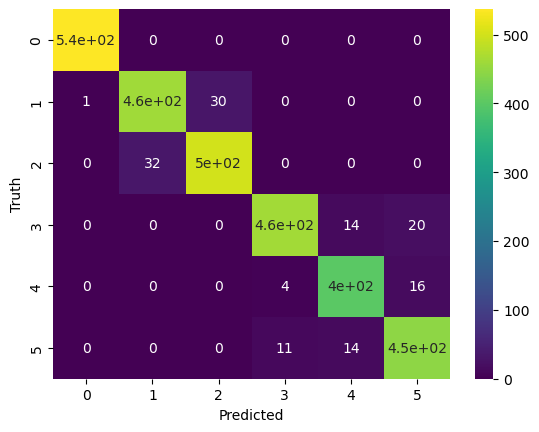

In [18]:
sns.heatmap(conf, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [19]:
df = pd.DataFrame({'y test':y_test,
                  'y predicted': y_pred})
df

,y test,y predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
2942,5,5
2943,5,5
2944,5,5
2945,5,5
